<a href="https://colab.research.google.com/github/gregtsado/DS/blob/master/U_mapEmployee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJECTIVES
Employee segmentation. The Aim of the Project is to create several clusters of employees based on different factors like personal data and work conditions.

In [ ]:
pip install umap-learn


     |████████████████████████████████| 81kB 4.1MB/s 
     |████████████████████████████████| 1.2MB 15.4MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=7d06d2a5a1aaad6ef77a2c6ba8b402f92fbe17b75ed03963430981e9b8176f2a
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=c0994a81bdfe5e058b1a3903c4595eed6bed577a61a448120d060ee9e65bd2ed
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import umap
import plotly.graph_objs as go
import plotly.figure_factory as ff

Importing the necessary libraries including umap


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Employees.csv to Employees.csv


Giving an overview of the dataset and sesing some vital informations like standard deviation and mean of numerical columns.

In [ ]:
# Importing dataset and examining it
dataset = pd.read_csv("Employees.csv")
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Age BusinessTravel  ... YearsSinceLastPromotion  YearsWithCurrManager
0   46  Travel_Rarely  ...                       0                     2
1   37  Travel_Rarely  ...                       0                     2
2   59     Non-Travel  ...                       2                     2
3   54     Non-Travel  ...                       4                     4
4   26  Travel_Rarely  ...                       5                     7

[5 rows x 26 columns]
(1470, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   BusinessTravel           1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   obje

After exploring the dataset, we see categorical columns that we need to convert to numerical inorder to feed them into the model. I have decided to map the 'male' values to 1 and 'female' to 0 and also 'yes' values to 1 and 'no' to 0

In [ ]:
# Converting categorical features to numerical features
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female':0})
dataset['OverTime'] = dataset['OverTime'].map({'Yes': 1, 'No':0})
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female':0})
dataset['OverTime'] = dataset['OverTime'].map({'Yes': 1, 'No':0})
dataset['Gender'] = dataset['Gender'].map({'Male': 1, 'Female':0})
dataset['OverTime'] = dataset['OverTime'].map({'Yes': 1, 'No':0})

Plotting a heat map correlation here to see features that are highly correlated to each other anf decide how to deal with them.

In [ ]:
# Plotting Correlation Heatmap
corrs = dataset.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

I am dropping several features I found to be highly correlated with another. For example Job Level and Salary income are highly correlated with other. Which makes sense because it is expected that the higher your job level, the more you would likely be paid. Leaving both features in the dataset causes a biasness of the model. SO I am dropping five of those highly correlated attributes. 

In [ ]:
# Dropping columns with high correlation + causation
dataset = dataset.drop(['YearsWithCurrManager','TotalWorkingYears','YearsSinceLastPromotion', 'PercentSalaryHike', 'JobLevel'], axis = 1)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   BusinessTravel           1470 non-null   object 
 2   Department               1470 non-null   object 
 3   DistanceFromHome         1470 non-null   int64  
 4   Education                1470 non-null   int64  
 5   EducationField           1470 non-null   object 
 6   EnvironmentSatisfaction  1470 non-null   int64  
 7   Gender                   0 non-null      float64
 8   JobInvolvement           1470 non-null   int64  
 9   JobRole                  1470 non-null   object 
 10  JobSatisfaction          1470 non-null   int64  
 11  MaritalStatus            1470 non-null   object 
 12  MonthlyIncome            1470 non-null   int64  
 13  NumCompaniesWorked       1470 non-null   int64  
 14  OverTime                

Creating a final dataset with all the categorical features and numerical concatenated together. Dummy columns were created to seperated columns with different values. Like the different Departments now each have their own columns. This increased the column count from 21 to 39

In [ ]:
# Creating dummy columns
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
final_data = pd.get_dummies(dataset, columns = categorical_features)
print(final_data.info())
print(final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   DistanceFromHome                   1470 non-null   int64  
 2   Education                          1470 non-null   int64  
 3   EnvironmentSatisfaction            1470 non-null   int64  
 4   Gender                             0 non-null      float64
 5   JobInvolvement                     1470 non-null   int64  
 6   JobSatisfaction                    1470 non-null   int64  
 7   MonthlyIncome                      1470 non-null   int64  
 8   NumCompaniesWorked                 1470 non-null   int64  
 9   OverTime                           0 non-null      float64
 10  PerformanceRating                  1470 non-null   int64  
 11  StockOptionLevel                   1470 non-null   int64

I have to create several subset of similar attributes group together, like age and gender in the same subset as well as a subset for work environment containing "Job satisfactio, Worklifebalance" and "JobInvolvement". Four Subsets were created.

In [ ]:
# Dividing data into subsets
#Personal Data
subset1 = final_data[['Age','Gender','MaritalStatus_Single','MaritalStatus_Married','MaritalStatus_Divorced','Education','EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing','EducationField_Medical','EducationField_Other','EducationField_Technical Degree','DistanceFromHome']]


In [ ]:

#Work Data
subset2 = final_data[['Department_Human Resources','Department_Research & Development','Department_Sales','OverTime','StockOptionLevel','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','PerformanceRating']]

#Life Quality Data
subset3 = final_data[['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance']]

#Potential Churn factors
subset4 = final_data[['JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement', 'WorkLifeBalance','OverTime','StockOptionLevel','YearsAtCompany','YearsInCurrentRole','PerformanceRating']]


Some columns have greater values than other, this disparity in number will create a biasness of the model towards the larger number variables. Hence it is important that we normalize the features 

In [ ]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)
X4 = feature_scaler.fit_transform(subset4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:765: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:706: RuntimeWarning:

Degrees of freedom <= 0 for slice.



Setting a Umap of 150 neigbours with 0.4mm minimum distance. after several tries was seen to produce the best results

In [ ]:
# Analysis on subset1 - Personal Data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X1)


# Modeling

Kmeans Neigbours is used too created clusters and the number of k value is deternmined with the elbow method. The value of k was found to be two as can be seen below.

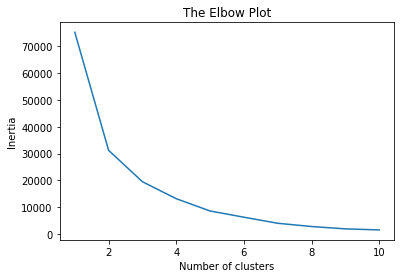

In [ ]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Kmeans Has produced 10 clusters with similar employees grouped together, for the first subset. Employees that are of the same age, divorced, similar distance from work to home are grouped together. 

In [ ]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

age = list(dataset['Age'])
gender = list(dataset['Gender'])
marital = list(dataset['MaritalStatus'])
education = list(dataset['Education'])
educationfield = list(dataset['EducationField'])
distance = list(dataset['DistanceFromHome'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Age: {a}; Gender: {b}; MaritalStatus:{c}, Education:{d}, EducationField:{e}, DistanceFromHome:{f}' for a,b,c,d,e,f in list(zip(age,gender,marital,education,educationfield,distance))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X2)


Employees clusters are created again for the second subset which is based on thier work environment  condintions.

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

department_Human = list(final_data['Department_Human Resources'])
department_Research = list(final_data['Department_Research & Development'])
department_Sales = list(final_data['Department_Sales'])
overtime = list(dataset['OverTime'])
stockOptionLevel = list(dataset['StockOptionLevel'])
trainingTimesLastYear = list(dataset['TrainingTimesLastYear'])
yearsAtCompany = list(dataset['YearsAtCompany'])
yearsInCurrentRole = list(dataset['YearsInCurrentRole'])
performanceRating = list(dataset['PerformanceRating'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Department_Human Resources: {a}; Department_Research & Development: {b}; Overtime:{c}, StockOptionLevel:{d}, TrainingTimesLastYear:{e}, YearsAtCompany:{f}, YearsInCurrentRole:{g}, PerformanceRating:{h}' for a,b,c,d,e,f,g,h,i in list(zip(department_Human,department_Research,department_Sales,overtime,stockOptionLevel,trainingTimesLastYear,yearsAtCompany,yearsInCurrentRole,performanceRating))],
                                hoverinfo='text')]
layout = go.Layout(title = 'UMAP Dimensionality Reduction subset2', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()



In [ ]:
u = umap.UMAP(n_neighbors=100, min_dist=0.8)
x_umap = u.fit_transform(X3)


More clusters are created based on employees work of job satisfaction and work balance.

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

job_satisfaction = list(dataset['JobSatisfaction'])
environment_satisfaction = list(dataset['EnvironmentSatisfaction'])
job_involvement = list(dataset['JobInvolvement'])
work_life = list(dataset['WorkLifeBalance'])


data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'JobSatisfaction: {a};EnvironmentSatisfaction : {b};JobInvolvement:{c}, WorkLifeBalance:{d}' for a,b,c,d in list(zip(job_satisfaction,environment_satisfaction,job_involvement,work_life))],
                                hoverinfo='text')]
layout = go.Layout(title = 'UMAP Dimensionality Reduction subset3', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()



In [ ]:
# Analysis on subset1 - Personal Data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x_umap = u.fit_transform(X4)


The last subset is baseed on work conditions and performance rating of workers.

In [ ]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(x_umap)

job_satisfaction = list(dataset['JobSatisfaction'])
environment_satisfaction = list(dataset['EnvironmentSatisfaction'])
job_involvement = list(dataset['JobInvolvement'])
work_life = list(dataset['WorkLifeBalance'])
overtime = list(dataset['OverTime'])
stockOptionLevel = list(dataset['StockOptionLevel'])
trainingTimesLastYear = list(dataset['TrainingTimesLastYear'])
yearsAtCompany = list(dataset['YearsAtCompany'])
yearsInCurrentRole = list(dataset['YearsInCurrentRole'])
performanceRating = list(dataset['PerformanceRating'])

data = [go.Scatter(x=x_umap[:,0], y=x_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'JobSatisfaction: {a};EnvironmentSatisfaction : {b};JobInvolvement:{c}, WorkLifeBalance:{d}, OverTime:{e}, StockOptionLevel:{f}, TrainingTimesLastYear:{g}, YearsAtCompany:{h}, YearsInCurrentRole:{i}, PerformanceRating:{j}' for a,b,c,d,e,f,g,h,i,j in list(zip(job_satisfaction,environment_satisfaction,job_involvement,work_life,overtime,stockOptionLevel,trainingTimesLastYear,yearsAtCompany,yearsInCurrentRole,performanceRating))],
                                hoverinfo='text')]
layout = go.Layout(title = 'UMAP Dimensionality Reduction subset4', width = 1200, height = 1200,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# CONCLUSION
We can be able to created sevveral clusters using Umap and Kmeans Clustering of employees in a company based on various parameters.

Four Different Subset were established from the features and these were work conditions, Personal data, Longivity in work. Various clusters were created of the employees on each of these factors.  